# **Births per month in Canada**

Different visualizations of births in Canadaper month

### Libraries and import of data

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Elimination of warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('canada_births.csv')

In [5]:
# Format
df.rename({'month':'date'}, axis=1 , inplace =True)
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

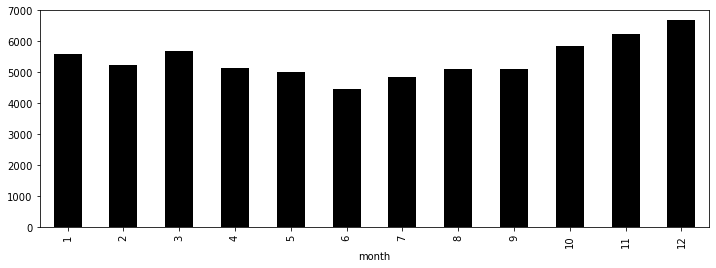

In [7]:
# Montly production
df['month'] = pd.DatetimeIndex(df['date']).month; df
df.groupby(['month']).sum()['production'].plot(figsize=(12,4), kind='bar', color='black');

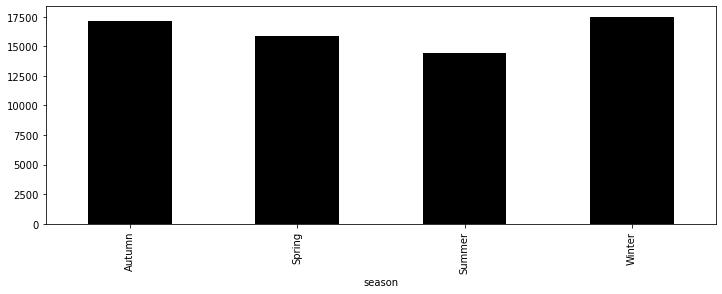

In [8]:
# Seasonal production
spring = [3, 4, 5]
summer = [6, 7, 8]
autumn = [9, 10, 11]
winter = [12, 1, 2]
df.loc[df['month'].isin(winter),'season'] = 'Winter'
df.loc[df['month'].isin(spring),'season'] = 'Spring'
df.loc[df['month'].isin(summer),'season'] = 'Summer'
df.loc[df['month'].isin(autumn),'season'] = 'Autumn'
df.groupby(['season']).sum()['production'].plot(figsize=(12,4), kind='bar', color='black');


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2016-01-01 to 2020-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   births  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


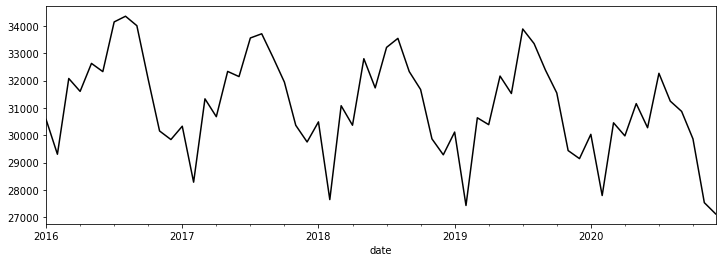

In [10]:
# Production over time
df['births'].plot(figsize=(12,4), color='black');


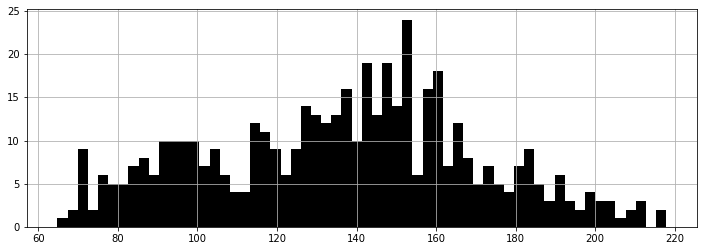

In [11]:
# Histogram of production distribution
df['production'].hist(bins=60, figsize=(12,4), color='black');


Text(0.5, 1.0, 'Births per Month Canada')

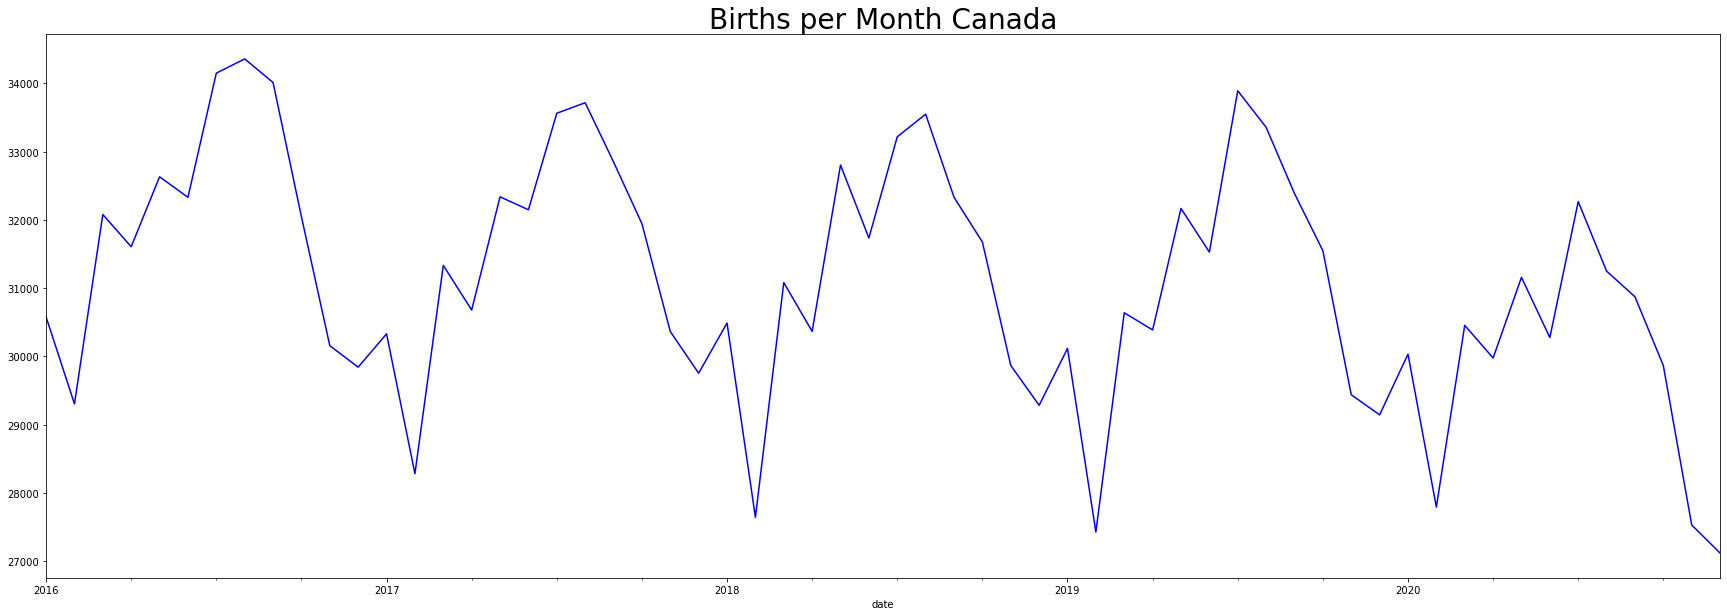

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
# Trend
df['births'].plot(figsize=(30,10), color='blue').set_title('Births per Month Canada', fontsize=28)
#df['production'].rolling(12).mean().plot(figsize=(12,4), color='red')


Text(0.5, 1.0, 'Births per Quarter Canada')

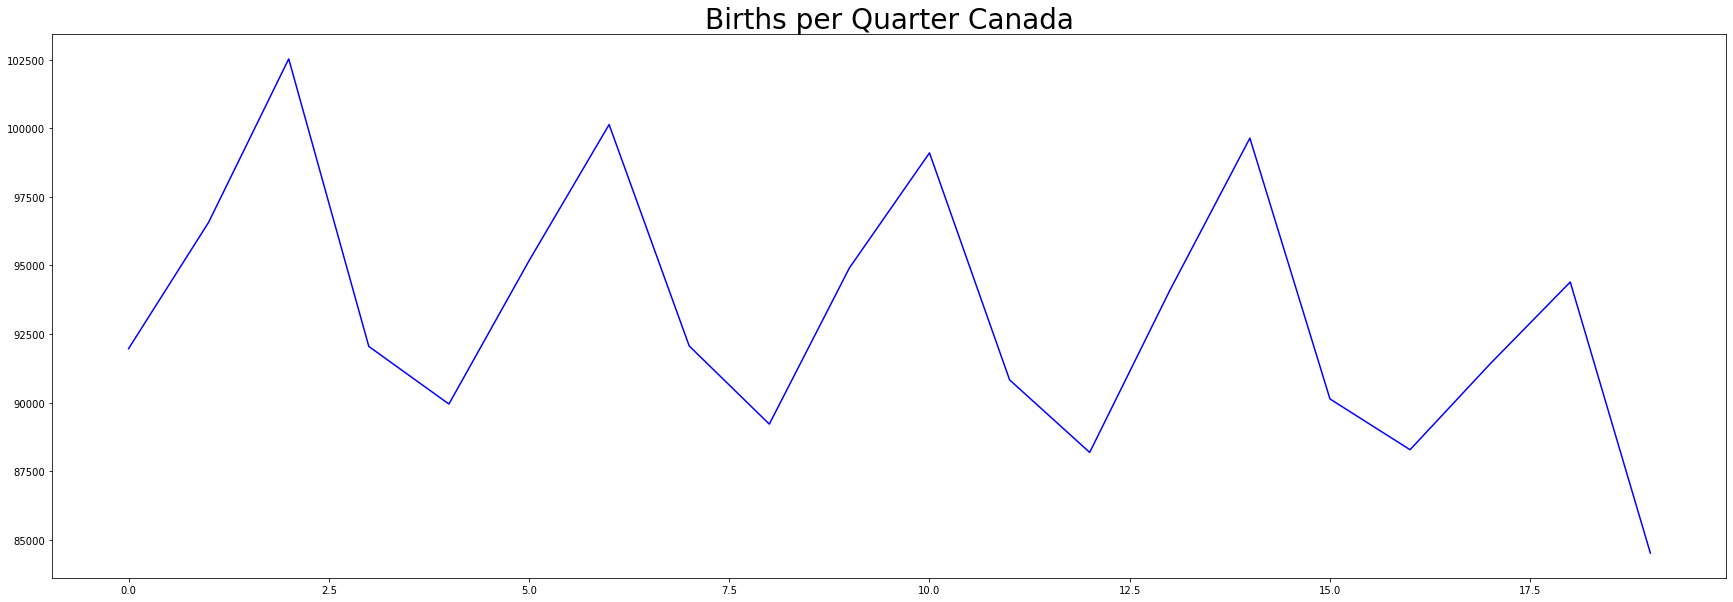

In [16]:
# We group per quarter and plot
df_Q = df.groupby(pd.PeriodIndex(df.date, freq='Q')).sum().reset_index()
# Trend
df_Q['births'].plot(figsize=(30,10), color='blue').set_title('Births per Quarter Canada', fontsize=28)
#df['production'].rolling(12).mean().plot(figsize=(12,4), color='red')


In [10]:
# Plotly
import plotly.express as px
df['production mean'] = df['production'].rolling(12).mean()
fig = px.line(df, x='date', y=["production", 'production mean'], hover_data=['season'])
fig['data'][0]['line']['color']='blue'
fig['data'][1]['line']['color']='red'

fig.show()

KeyError: 'production'

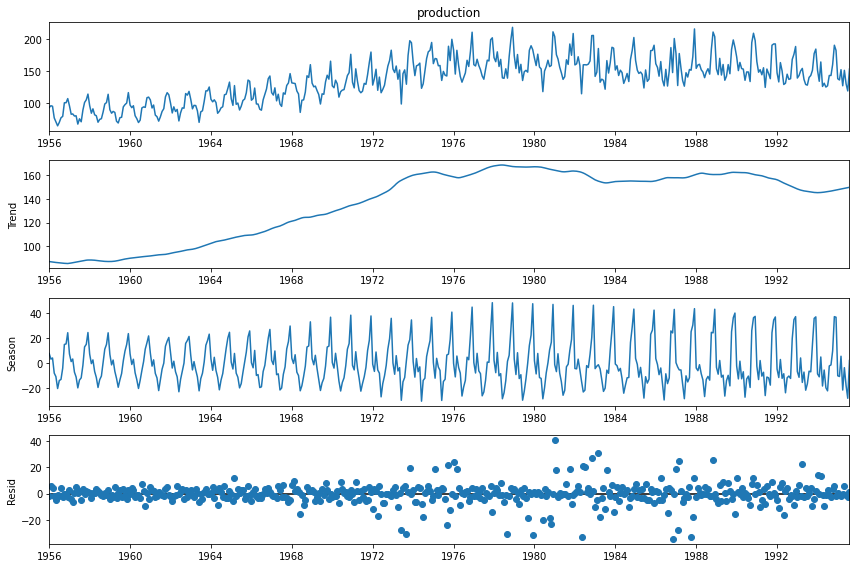

In [13]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import STL
plt.rc('figure',figsize=(12, 8))

stl = STL(df['production'], period=12, robust=True)
result = stl.fit()
fig = result.plot() # trend narrows since 1975

In [14]:
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
def adf_test (series, title=""):
        print(f'Augmented Dickey-Fuller Test: {title}\n')
        result = adfuller(series.dropna(), autolag='AIC')
        output = pd.Series(result[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])
        print(output.to_string())
        if result[1] <= 0.05:
                print("\n is stationary")
        else:
                print("\n is non-stationary")

adf_test(df['production']) # zero hypothesis of non-stationarity cannot be rejected at 5% significance level

Augmented Dickey-Fuller Test: 

ADF Test Statistic     -2.282661
p-value                 0.177621
# Lags Used            17.000000
# Observations        458.000000

 is non-stationary


Augmented Dickey-Fuller Test: 

ADF Test Statistic     -2.800769
p-value                 0.058164
# Lags Used            17.000000
# Observations        458.000000

 is non-stationary


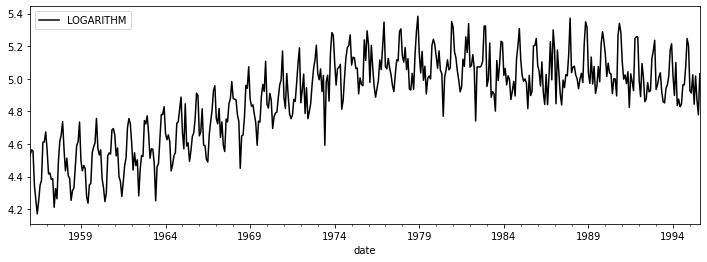

In [15]:
# Logarithm
adf_test(np.log(df['production'])) # zero hypothesis of non-stationarity cannot be rejected at 5% significance level
df['production log'] = np.log(df['production'])
df['production log'].plot(legend=True, label='LOGARITHM', c='black', figsize=(12,4));

Augmented Dickey-Fuller Test: 

ADF Test Statistic     -4.980664
p-value                 0.000024
# Lags Used            18.000000
# Observations        456.000000

 is stationary


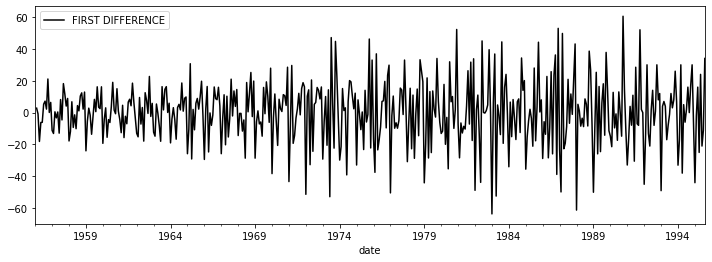

In [16]:
# First difference
adf_test(df['production'].diff()) # zero hypothesis of non-stationarity can be rejected at 5% significance level
df['production dif1'] = df['production'].diff()
df['production dif1'].plot(legend=True, label='FIRST DIFFERENCE', c='black', figsize=(12,4));

In [17]:
df
df.index.freq = "MS" # month start frequency

# EXPONENTIAL SMOOTHING

In [18]:
# Splitting
train = df.loc[:'1994-08-01']; train
test = df.loc['1994-09-01':]; test

,date,production,year,month,season,production mean,production log,production dif1
date,,,,,,,,
1994-09-01,1994-09-01,143.0,1994,9,Autumn,146.333333,4.962845,0.0
1994-10-01,1994-10-01,160.0,1994,10,Autumn,147.083333,5.075174,17.0
1994-11-01,1994-11-01,190.0,1994,11,Autumn,148.166667,5.247024,30.0
1994-12-01,1994-12-01,182.0,1994,12,Winter,148.000000,5.204007,-8.0
1995-01-01,1995-01-01,138.0,1995,1,Winter,146.916667,4.927254,-44.0
1995-02-01,1995-02-01,136.0,1995,2,Winter,147.083333,4.912655,-2.0
1995-03-01,1995-03-01,152.0,1995,3,Spring,146.083333,5.023881,16.0
1995-04-01,1995-04-01,127.0,1995,4,Spring,146.166667,4.844187,-25.0
1995-05-01,1995-05-01,151.0,1995,5,Spring,147.833333,5.017280,24.0


In [19]:
# Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train['production'], # takes means from the last inputs, the latest inputs are more important
                             trend='mul',
                             seasonal='add',
                             seasonal_periods=12).fit()

In [20]:
# Prediction
start = len(test)
pred = model.forecast(start).rename('prediction'); pred

1994-09-01    132.529116
1994-10-01    159.593669
1994-11-01    169.957699
1994-12-01    180.216770
1995-01-01    143.836743
1995-02-01    132.930651
1995-03-01    147.113061
1995-04-01    133.318087
1995-05-01    128.105995
1995-06-01    115.533388
1995-07-01    125.777916
1995-08-01    129.268568
Freq: MS, Name: prediction, dtype: float64

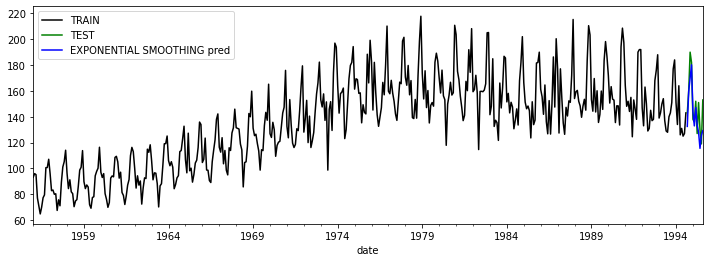

In [21]:
# Plot
train['production'].plot(legend=True, label='TRAIN', c='black', figsize=(12,4))
test['production'].plot(legend=True, label='TEST', c='green', figsize=(12,4))
pred.plot(legend=True, label='EXPONENTIAL SMOOTHING pred', c='blue');

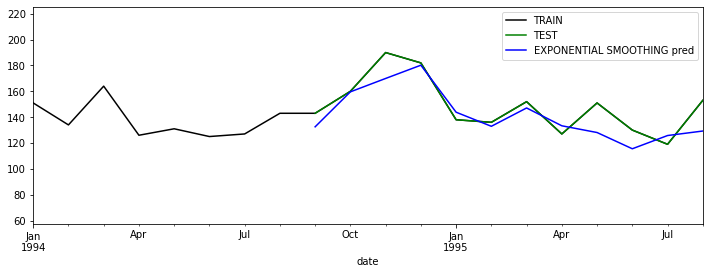

In [22]:
# Zoomed plot
df['production'].plot(legend=True, label='TRAIN', c='black', figsize=(12,4))
test['production'].plot(legend=True, label='TEST', c='green', figsize=(12,4))
pred.plot(legend=True, label='EXPONENTIAL SMOOTHING pred', c='blue', xlim=['1994-01-01', '1995-08-01']);

In [23]:
# Evaluation
from sklearn.metrics import mean_squared_error
print('Root mean squared error: ', round(np.sqrt(mean_squared_error(test['production'], pred)),4))

Root mean squared error:  12.7949


# SARIMA

In [24]:
# S - Seasonality, yearly changes AR - Autoregression, changing variables that regress on its own lagged values, I - Integrated, diff() makes it stationary, MA - Moving Avarage, takes into consideration errors of the previous inputs
df = df.loc['1975-01-01':] # we take trend based on seasonal decomposition

In [25]:
# Splitting
train = df.loc[:'1994-09-01']; train
test = df.loc['1994-09-01':]; test

,date,production,year,month,season,production mean,production log,production dif1
date,,,,,,,,
1994-09-01,1994-09-01,143.0,1994,9,Autumn,146.333333,4.962845,0.0
1994-10-01,1994-10-01,160.0,1994,10,Autumn,147.083333,5.075174,17.0
1994-11-01,1994-11-01,190.0,1994,11,Autumn,148.166667,5.247024,30.0
1994-12-01,1994-12-01,182.0,1994,12,Winter,148.000000,5.204007,-8.0
1995-01-01,1995-01-01,138.0,1995,1,Winter,146.916667,4.927254,-44.0
1995-02-01,1995-02-01,136.0,1995,2,Winter,147.083333,4.912655,-2.0
1995-03-01,1995-03-01,152.0,1995,3,Spring,146.083333,5.023881,16.0
1995-04-01,1995-04-01,127.0,1995,4,Spring,146.166667,4.844187,-25.0
1995-05-01,1995-05-01,151.0,1995,5,Spring,147.833333,5.017280,24.0


In [26]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 511 kB/s            


In [27]:
# SARIMA normal
import pmdarima as pm
model = pm.auto_arima(train['production'], stepwise=True, seasonal=True, trace=True,
                                        start_p = 0, start_q = 0,
                                        max_p = 4, max_q = 4,
                                        test = 'adf', d = 1, # first difference
                                        m=12)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2150.506, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2035.239, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2148.509, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2137.278, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2029.510, Time=1.03 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2083.426, Time=0.69 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1973.166, Time=1.80 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1996.280, Time=0.66 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=1971.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  237
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -937.017
Date:                            Sat, 08 Jan 2022   AIC                           1890.033
Time:                                    17:52:20   BIC                           1917.744
Sample:                                         0   HQIC                          1901.203
                                            - 237                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0007      0.001     -0.784      0.433      -0.002       0.001
ar.L1         -0.0656      0.062     -1.054      0.292      -0.188       0.056
ar.L2         -0.0554      0.067     -0.824      0.410      -0.187       0.076
ma.L1         -0.9890      0.025    -39.714      0.000      -1.038      -0.940
ar.S.L12       1.1584      0.087     13.363      0.000       0.988       1.328
ar.S.L24      -0.1681      0.083     -2.014      0.044      -0.332      -0.005
ma.S.L12      -0.8297      0.082    -10.148      0.000      -0.990      -0.669
sigma2       146.0266     13.666     10.685      0.000     119.241     172.812
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.83   Prob(JB):                         0.36
Heteroskedasticity (H):               0.79   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['production'], order=(2, 1, 1), seasonal_order=(2, 0, 1, 12)) # parameters from auto arima
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33877D+00    |proj g|=  2.62235D-01


 This problem is unconstrained.



At iterate    5    f=  4.20016D+00    |proj g|=  4.25191D-02

At iterate   10    f=  3.98615D+00    |proj g|=  8.51477D-02

At iterate   15    f=  3.95772D+00    |proj g|=  3.63182D-03

At iterate   20    f=  3.95351D+00    |proj g|=  3.31269D-02

At iterate   25    f=  3.94369D+00    |proj g|=  3.33434D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     39      1     0     0   3.243D-02   3.944D+00
  F =   3.9436867008431831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         production   No. Observations:                  237
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -934.654
Date:                            Sat, 08 Jan 2022   AIC                           1883.307
Time:                                    17:52:23   BIC                           1907.554
Sample:                                01-01-1975   HQIC                          1893.082
                                     - 09-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0455      0.058     -0.790      0.429      -0.158       0.067
ar.L2         -0.0852      0.063     -1.354      0.176      -0.209       0.038
ma.L1         -0.9857      0.031    -31.784      0.000      -1.046      -0.925
ar.S.L12       1.2249      0.055     22.165      0.000       1.117       1.333
ar.S.L24      -0.2261      0.054     -4.179      0.000      -0.332      -0.120
ma.S.L12      -0.9354      0.117     -8.000      0.000      -1.165      -0.706
sigma2       138.5728     14.195      9.762      0.000     110.750     166.395
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.80   Prob(JB):                         0.35
Heteroskedasticity (H):               0.85   Skew:                            -0.04
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Prediction
start = len(train) - 1
end = len(train) + len(test) - 2

pred = results.predict(start, end).rename('SARIMA pred'); pred

1994-09-01    141.711657
1994-10-01    162.533341
1994-11-01    176.695138
1994-12-01    188.185326
1995-01-01    153.463306
1995-02-01    141.274637
1995-03-01    158.633613
1995-04-01    139.311982
1995-05-01    136.477773
1995-06-01    126.133433
1995-07-01    134.194039
1995-08-01    141.564731
Freq: MS, Name: SARIMA pred, dtype: float64

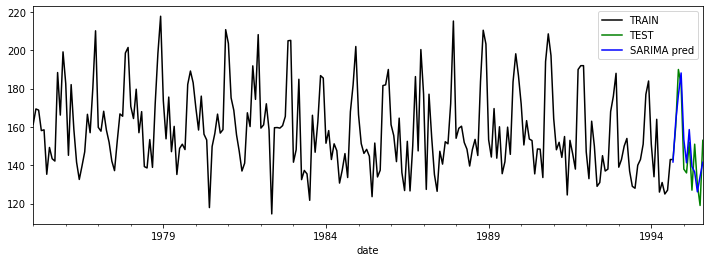

In [30]:
# Plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
test['production'].plot(figsize = (12,4), legend=True, color="green", label='TEST')
pred.plot(legend=True, color='blue');

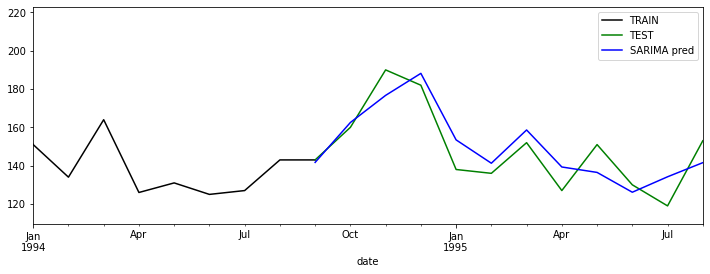

In [31]:
# Zoomed plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
test['production'].plot(figsize = (12,4), legend=True, color="green", label='TEST')
pred.plot(legend=True, color='blue', xlim=['1994-01-01', '1995-08-01']);

In [32]:
# Evaluation
from sklearn.metrics import mean_squared_error
print('Root mean squared error: ', round(np.sqrt(mean_squared_error(test['production'], pred)),4))

Root mean squared error:  10.3011


In [33]:
# SARIMA log (used natural log of production)
import pmdarima as pm
model = pm.auto_arima(train['production log'], stepwise=True, seasonal=True, trace=True,
                                        start_p = 0, start_q = 0,
                                        max_p = 4, max_q = 4,
                                        test = 'adf', d = 1, # first difference
                                        m=12)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-248.948, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-361.475, Time=0.79 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-250.945, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-265.430, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-366.242, Time=1.30 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-307.877, Time=1.00 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-425.677, Time=3.39 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-404.463, Time=0.79 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=-463.600, Time=3.81 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  237
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 261.269
Date:                            Sat, 08 Jan 2022   AIC                           -508.539
Time:                                    17:53:34   BIC                           -484.292
Sample:                                         0   HQIC                          -498.765
                                            - 237                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.034e-05   4.79e-05     -0.424      0.671      -0.000    7.36e-05
ar.L1         -0.1922      0.067     -2.848      0.004      -0.325      -0.060
ar.L2         -0.1431      0.072     -1.979      0.048      -0.285      -0.001
ma.L1         -0.9191      0.029    -32.247      0.000      -0.975      -0.863
ar.S.L12       0.9815      0.013     76.210      0.000       0.956       1.007
ma.S.L12      -0.7225      0.076     -9.511      0.000      -0.871      -0.574
sigma2         0.0059      0.001     11.474      0.000       0.005       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 7.07
Prob(Q):                              0.85   Prob(JB):                         0.03
Heteroskedasticity (H):               0.77   Skew:                            -0.29
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['production log'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.87657D-01    |proj g|=  1.51212D+00

At iterate    5    f= -8.35846D-01    |proj g|=  2.97657D+00


 This problem is unconstrained.



At iterate   10    f= -9.12275D-01    |proj g|=  6.12884D-01

At iterate   15    f= -9.35439D-01    |proj g|=  3.43248D-01

At iterate   20    f= -9.67507D-01    |proj g|=  2.78745D-01

At iterate   25    f= -1.09839D+00    |proj g|=  2.56806D-01

At iterate   30    f= -1.09876D+00    |proj g|=  2.18066D-02

At iterate   35    f= -1.10176D+00    |proj g|=  4.73552D-01

At iterate   40    f= -1.11629D+00    |proj g|=  2.61597D-01

At iterate   45    f= -1.12042D+00    |proj g|=  5.94367D-02
  ys=-1.903E-05  -gs= 1.280E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     77      1     1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     production log   No. Observations:                  237
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 265.541
Date:                            Sat, 08 Jan 2022   AIC                           -519.082
Time:                                    17:53:36   BIC                           -498.299
Sample:                                01-01-1975   HQIC                          -510.704
                                     - 09-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2301      0.010    -23.934      0.000      -0.249      -0.211
ar.L2         -0.2012      0.059     -3.430      0.001      -0.316      -0.086
ma.L1         -0.8760      0.037    -23.946      0.000      -0.948      -0.804
ar.S.L12       0.9995      0.001    768.135      0.000       0.997       1.002
ma.S.L12      -0.9342      0.083    -11.260      0.000      -1.097      -0.772
sigma2         0.0051      0.000     10.373      0.000       0.004       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                10.89
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.40
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Prediction
start = len(train) - 1
end = len(train) + len(test) - 2

pred = np.exp(results.predict(start, end).rename('SARIMA log pred')); pred

1994-09-01    135.045725
1994-10-01    157.212138
1994-11-01    169.437058
1994-12-01    183.632999
1995-01-01    148.807864
1995-02-01    138.530518
1995-03-01    151.507540
1995-04-01    138.918943
1995-05-01    133.530869
1995-06-01    122.724347
1995-07-01    132.139613
1995-08-01    136.622687
Freq: MS, Name: SARIMA log pred, dtype: float64

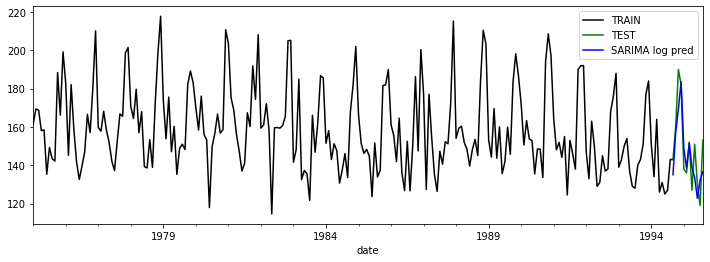

In [36]:
# Plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
test['production'].plot(figsize = (12,4), legend=True, color="green", label='TEST')
pred.plot(legend=True, color='blue');

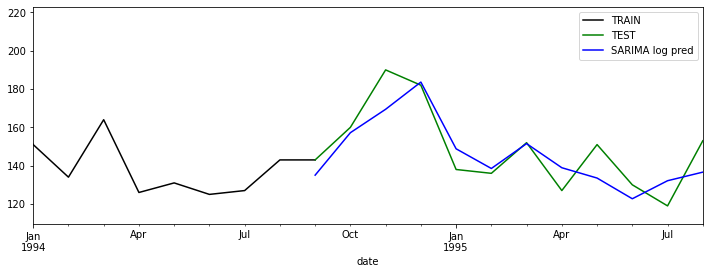

In [37]:
# Zoomed plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
test['production'].plot(figsize = (12,4), legend=True, color="green", label='TEST')
pred.plot(legend=True, color='blue', xlim=['1994-01-01', '1995-08-01']);

In [38]:
# Evaluation
from sklearn.metrics import mean_squared_error
print('Root mean squared error: ', round(np.sqrt(mean_squared_error(test['production'], pred)),4))

Root mean squared error:  11.4055


# LSTM (Long Short Term Memory Unit)

In [39]:
# Splitting
train = pd.DataFrame(df.loc[:'1994-09-01']['production']); train
test = pd.DataFrame(df.loc['1994-09-01':]['production']); test

,production
date,
1994-09-01,143.0
1994-10-01,160.0
1994-11-01,190.0
1994-12-01,182.0
1995-01-01,138.0
1995-02-01,136.0
1995-03-01,152.0
1995-04-01,127.0
1995-05-01,151.0


In [40]:
# Scaling needed 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [41]:
# Model
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12 # lenght of the test set
n_features = 1

train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = train_generator[0]

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [42]:

# Fitting
model.fit_generator(train_generator, epochs=20)

2022-01-08 17:53:44.669851: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
225/225 [==============================] - 3s 7ms/step - loss: 0.0494
Epoch 2/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0333
Epoch 3/20
225/225 [==============================] - 1s 7ms/step - loss: 0.0346
Epoch 4/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0253
Epoch 5/20
225/225 [==============================] - 1s 7ms/step - loss: 0.0212
Epoch 6/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0202
Epoch 7/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0226
Epoch 8/20
225/225 [==============================] - 2s 9ms/step - loss: 0.0199
Epoch 9/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0205
Epoch 10/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0192
Epoch 11/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0199
Epoch 12/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0193
Epoch 13/20
225/225 [====

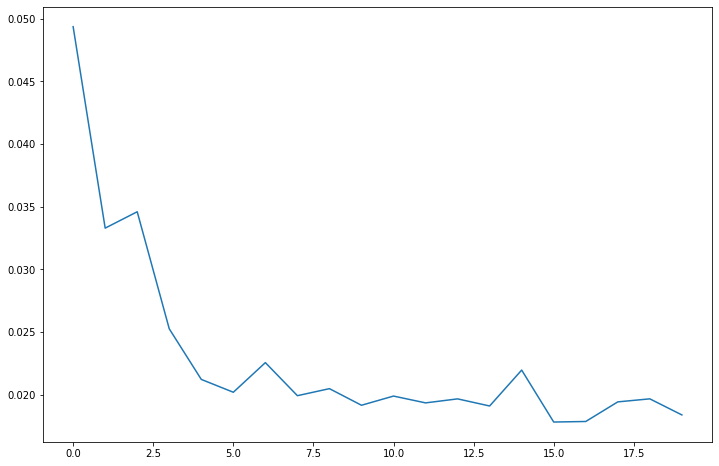

In [43]:
# Loss
myloss = model.history.history['loss']
plt.plot(range(len(myloss)), model.history.history['loss']);

In [44]:
# 12 history steps
first_eval_batch = scaled_train[-12:]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)

array([[0.31434026]], dtype=float32)

In [45]:
# RNN (Recurrent Neural Network) forecast
test_predictions = [] # holding my predicitons
first_eval_batch = scaled_train[-n_input:] # last n_input(20) points from the training set
current_batch = first_eval_batch.reshape((1, n_input, n_features)) # reshape this to the format RNN wants

In [46]:
for i in range(12): # how far into the future will I forecast?
                           # len(test) --> 12 months

        # One timestep ahead of historical 12 points
        current_pred = model.predict(current_batch)[0]
        # Store that prediction
        test_predictions.append(current_pred)
        # Update current batch to include prediction
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


In [47]:
# Prediction
true_predictions = scaler.inverse_transform(test_predictions)
date = pd.date_range(start="1994-09-01", end="1995-08-01", freq='MS')

pred = pd.DataFrame({"DATE" : date, 'prediction' : np.round(true_predictions.reshape(1,-1)[0])})
pred.set_index('DATE', inplace=True); pred

,prediction
DATE,
1994-09-01,147.0
1994-10-01,162.0
1994-11-01,164.0
1994-12-01,145.0
1995-01-01,140.0
1995-02-01,148.0
1995-03-01,137.0
1995-04-01,137.0
1995-05-01,136.0


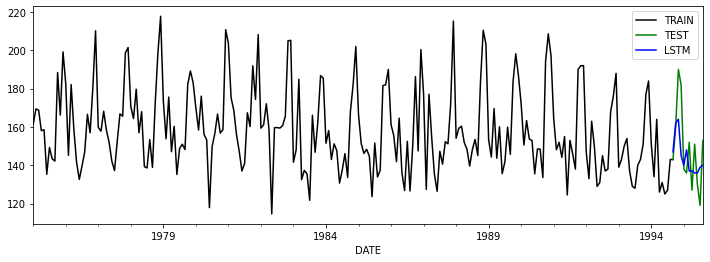

In [48]:
# Plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
test['production'].plot(figsize = (12,4), legend=True, color="green", label='TEST')
pred['prediction'].plot(legend=True, color='blue', label='LSTM');

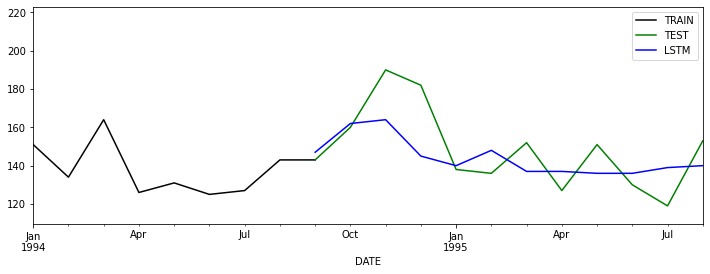

In [49]:
# Zoomed plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
test['production'].plot(figsize = (12,4), legend=True, color="green", label='TEST')
pred['prediction'].plot(legend=True, color='blue', label='LSTM', xlim=['1994-01-01', '1995-08-01']);


In [50]:
# Evaluation
from sklearn.metrics import mean_squared_error
print('Root mean squared error: ', round(np.sqrt(mean_squared_error(test['production'], pred['prediction'])),4))

Root mean squared error:  16.7531


# 1996 # for prediction was chosen SARIMA model because of the lowest RMSE

In [51]:
train = df.loc['1975-01-01':]; train

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['production'], order=(2, 1, 1), seasonal_order=(2, 0, 1, 12))
results = model.fit()
results.summary()

start = len(train) - 1 # to have the last current observation
end = len(train) + 16 - 1 # till the end of 1995 + whole year 1996 - 1 (1997-01-01)

pred = results.predict(start, end).rename('SARIMA pred'); pred

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33423D+00    |proj g|=  2.55162D-01


 This problem is unconstrained.



At iterate    5    f=  4.19446D+00    |proj g|=  6.48083D-02

At iterate   10    f=  3.96072D+00    |proj g|=  4.27954D-02

At iterate   15    f=  3.94698D+00    |proj g|=  2.93470D-03

At iterate   20    f=  3.94110D+00    |proj g|=  5.42835D-02

At iterate   25    f=  3.91867D+00    |proj g|=  1.35334D-02

At iterate   30    f=  3.91794D+00    |proj g|=  4.64752D-04

At iterate   35    f=  3.91764D+00    |proj g|=  4.32178D-03

At iterate   40    f=  3.91729D+00    |proj g|=  1.38384D-03
  ys=-2.263E-05  -gs= 5.490E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  3.91725D+00    |proj g|=  7.65490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     87      2     1     0   1.601D-04   3.917D+00
  F =   3.9172524662738186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


1995-08-01    138.578777
1995-09-01    137.329590
1995-10-01    159.645734
1995-11-01    177.945292
1995-12-01    185.381015
1996-01-01    147.048765
1996-02-01    138.363669
1996-03-01    152.678420
1996-04-01    136.437460
1996-05-01    137.888723
1996-06-01    123.915498
1996-07-01    129.138180
1996-08-01    140.662366
1996-09-01    136.053659
1996-10-01    161.159549
1996-11-01    174.784746
1996-12-01    184.807668
Freq: MS, Name: SARIMA pred, dtype: float64

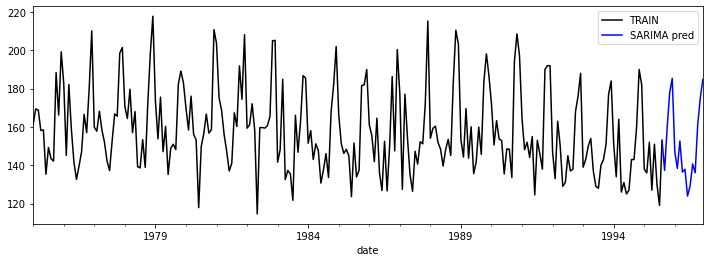

In [52]:
# Plot
pred[0] = 153 # to make our plot smoother and connected
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
pred.plot(legend=True, color='blue');

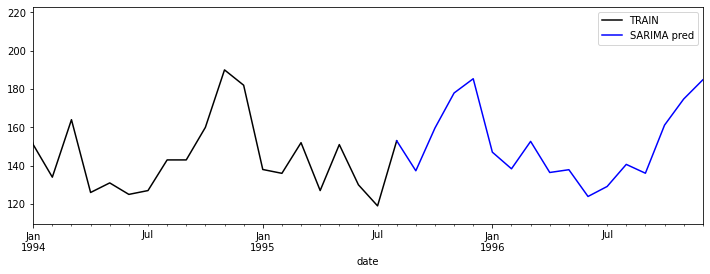

In [53]:
# Zoomed plot
train['production'].plot(figsize = (12,4), legend=True, color='black', label='TRAIN')
pred.plot(legend=True, color='blue', xlim=['1994-01-01', '1996-12-01']);

In [54]:
year_1996 = pd.DataFrame(pred); print(year_1996.loc['1996-01-01':'1996-12-01'])

# Conclusion: out of our three models the best performace has SARIMA based on RMSE as it includes not only trend but also seasonality.

            SARIMA pred
1996-01-01   147.048765
1996-02-01   138.363669
1996-03-01   152.678420
1996-04-01   136.437460
1996-05-01   137.888723
1996-06-01   123.915498
1996-07-01   129.138180
1996-08-01   140.662366
1996-09-01   136.053659
1996-10-01   161.159549
1996-11-01   174.784746
1996-12-01   184.807668
